## nltk.tree.Tree の使い方

まず、教科書と同じ木構造を読み込む。

In [3]:
print(tree.leaves())

['Time', 'flies', 'like', 'an', 'arrow']


### チョムスキー標準形にする

CKY 法は入力の木構造がチョムスキー標準形である必要がある。
返り値はなく、`tree` が直接書き換わる。

In [4]:
tree.chomsky_normal_form()

### チョムスキー標準形にする

CKY 法の推論結果はチョムスキー標準形だが、評価時の Gold File 内の木構造は任意の木構造なので、チョムスキー標準形をもとの構造に戻す必要がある。

In [5]:
tree.un_chomsky_normal_form()

## reader.py

ツリーバンクの読み込みに関するモジュール

### read_parsed_corpus

../treebank_3/parsed/mrg/wsj/00/wsj_0001.mrg


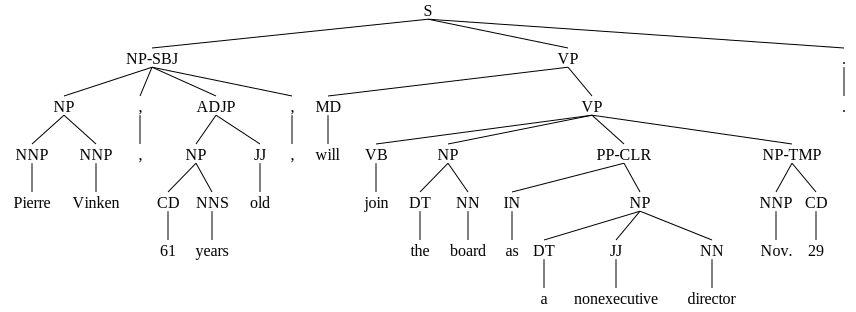

In [6]:
from nltk.tree import Tree
from reader import read_parsed_corpus
from IPython.display import display

# 00/wsj_*.mrg から 10/wsj_*.mrg までを Tree 型で取得する。
for path, _tree in read_parsed_corpus("../treebank_3/parsed/mrg/wsj", range(0, 11)):
    print(path)
    display(_tree)
    break  # 1 つ目だけチェックして終了

## chart.py

### sent2cell

CKY チャートを作成する。各セルは集合。これで教科書の擬似コードの通りに書ける。

In [7]:
from pathlib import Path as p
from nltk.tree import Tree
from chart import sent2cell

cell = sent2cell(tree.leaves())

# cell[0, 3] の集合に "A" を追加する。
cell[0][3].add("A")
cell[1][5].add("B")

# 2 次元配列をいい感じに出力する裏技
print(*cell, sep="\n")

[set(), {'Time'}, set(), {'A'}, set(), set()]
[set(), set(), {'flies'}, set(), set(), {'B'}]
[set(), set(), set(), {'like'}, set(), set()]
[set(), set(), set(), set(), {'an'}, set()]
[set(), set(), set(), set(), set(), {'arrow'}]
[set(), set(), set(), set(), set(), set()]


## counter.py

### rule_as_dict

`Tree` から得た構造ルールから、推論時に葉から根に向かうために必要な情報を得る。
`max` 関数を使うことで最も確率が高いルールが得られる。
`heap.nlargest` 関数を使うと最も確率が高い n 個のルールが得られるのでビームサーチで使えそう。

In [8]:
from pprint import pprint
from counter import rule_as_dict

lexical_dict, syntax_dict, unary_dict = rule_as_dict(tree.productions())
pprint(lexical_dict)
print(max(lexical_dict["Time"]))
print()
pprint(syntax_dict)
print(max(syntax_dict[('D', 'N')]))
print()
print(unary_dict)

{'Time': [(0.5, 'N')],
 'an': [(1.0, 'D')],
 'arrow': [(0.5, 'N')],
 'flies': [(1.0, 'V')],
 'like': [(1.0, 'P')]}
(0.5, 'N')

{('D', 'N'): [(1.0, 'NP')],
 ('NP', 'VP'): [(1.0, 'S')],
 ('P', 'NP'): [(1.0, 'PP')],
 ('V', 'PP'): [(1.0, 'VP')]}
(1.0, 'NP')

{('N',): [(1.0, 'NP', ('N',))]}


全学習用データの統計結果は以下のようにして取得できる。以下の例は、ランダムに 5 個の辞書を取得している。

In [30]:
import pickle
from random import sample
from pathlib import Path as p
from pprint import pprint

from counter import rule_as_dict
from nltk.tree import Tree

check = pickle.loads(p("../stats/lexical_dict.pkl").read_bytes())
pprint(dict(sample(sorted(check.items()), 5)))

{'1978': [(0.0002734631371691096, 'CD')],
 'Adjusters': [(3.3413525795241913e-05, 'NNS')],
 'brag': [(3.7824343747635976e-05, 'VB')],
 'chassis': [(1.6706762897620957e-05, 'NNS'), (7.522473389250386e-06, 'NN')],
 'romancing': [(6.735821096591675e-05, 'VBG')]}
